In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

### 用FacetGrid子集数据

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


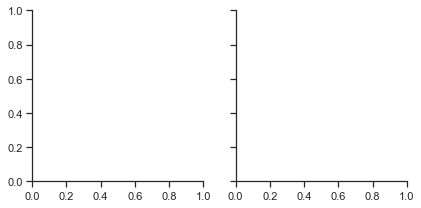

In [3]:
g = sns.FacetGrid(tips, col="time")
# 这样只是初始化网格设置了matplotlib图形和轴，但并没有绘制任何东西。

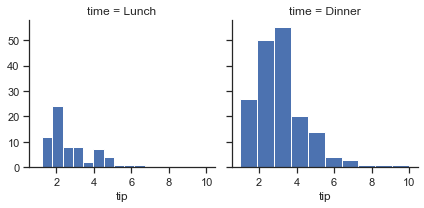

In [4]:
# 在此网格上可视化数据的主要方法是使用FacetGrid.map()方法，提供一个绘图功能和数据框中变量的名称来绘制
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

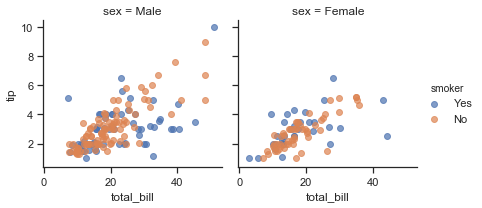

In [5]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

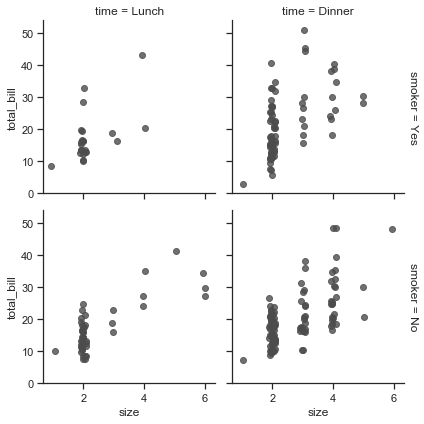

In [6]:
# 有几个选项可以控制可以传递给类构造函数的网格的外观
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

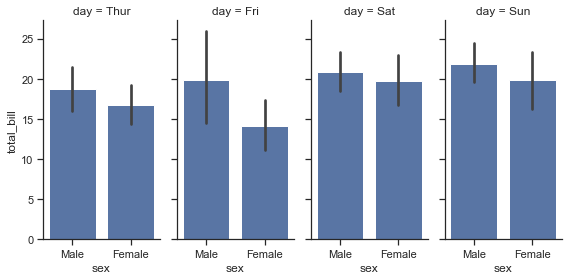

In [9]:
# 通过提供每个图形的高度以及纵横比来达到设置图形大小的目的
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")

d:\1902\.venv\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


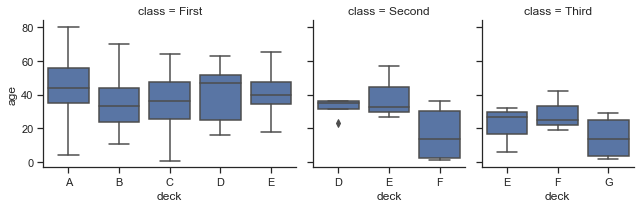

In [10]:
#使用适当的*_order参数来指定任何平面维度的数据顺序
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

d:\1902\.venv\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


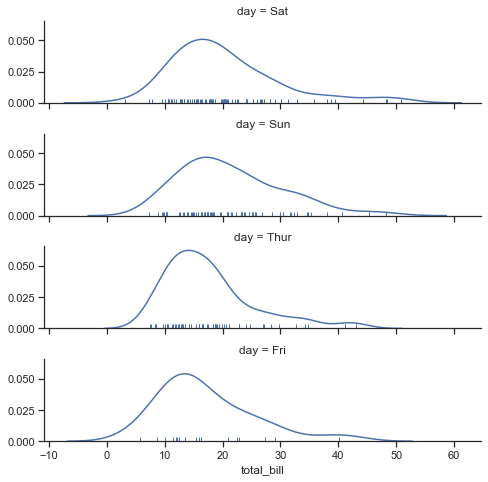

In [12]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

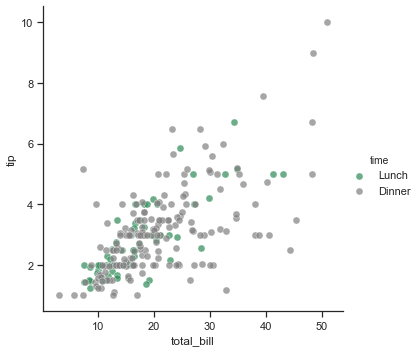

In [13]:
# 使用调色板
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

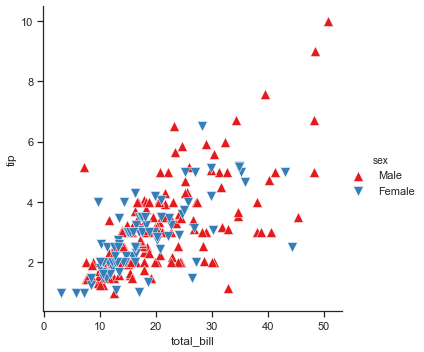

In [14]:
# 调整hue的属性
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

d:\1902\.venv\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


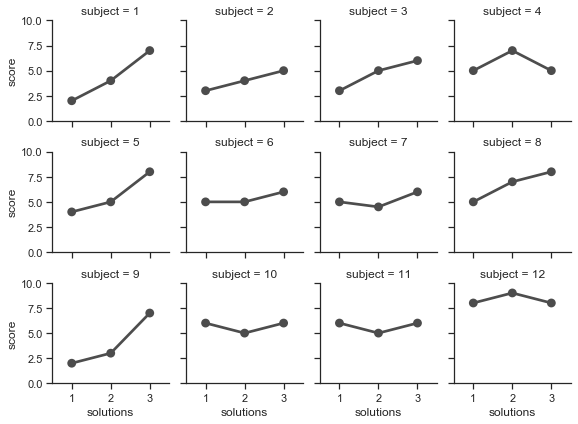

In [15]:
# 如果您有多个级别的一个变量，您可以沿着列绘制，但是"wrap"它们，以便跨越多个行。 当这样做时，将不能使用行(row)变量
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None)

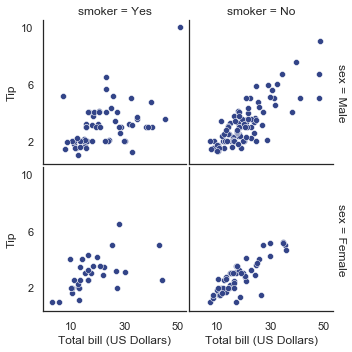

In [16]:
# 使用FacetGrid.map()（可以多次调用）绘制图形之后，您可能需要调整绘图的某些方面。 
# FacetGrid对象上还有一些方法可以在更高层次的抽象上操作图形。 最通用的是FacetGrid.set()，还有其他更专门的方法，
# 如FacetGrid.set_axis_labels()，它遵循内部方面没有轴标签的效果。 例如
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02)

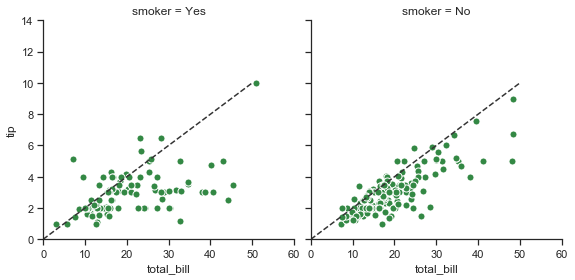

In [17]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))

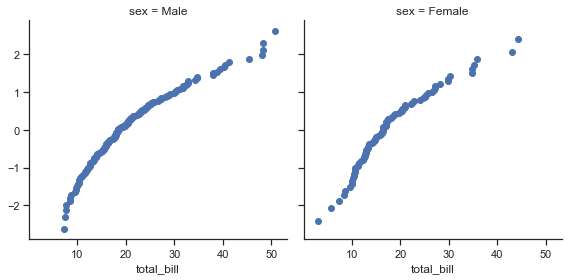

In [18]:
# 将自定义函数应用在网格上
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill")

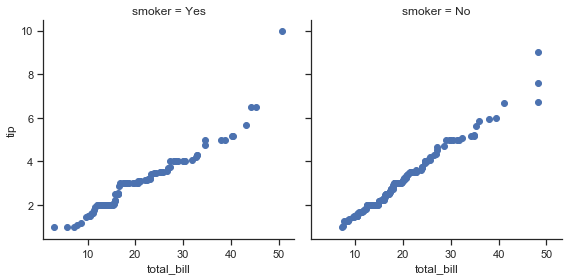

In [19]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")

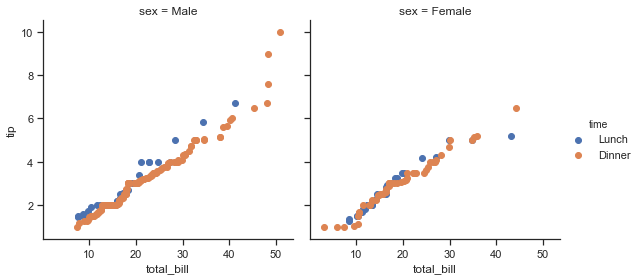

In [20]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

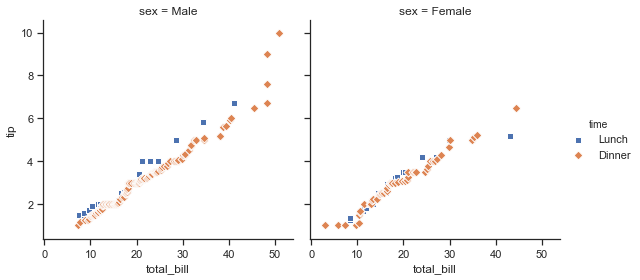

In [21]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()

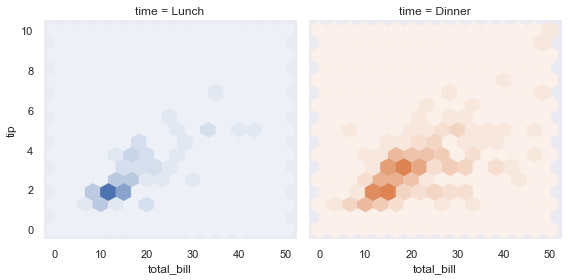

In [22]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])

#### 用PairGrid and pairplot()绘制成对的关系

PairGrid还允许您使用相同的绘图类型快速绘制小子图的网格，以在每个图形中显示数据。在一个PairGrid中，每个行和列分配给一个不同的变量，所以生成的图显示了数据集中的每个成对关系。这种风格的绘图有时被称为“散点图矩阵”，因为这是显示每个关系的最常见方式，但是PairGrid不仅限于散点图。

了解FacetGrid和PairGrid之间的区别很重要。在前者中，每个方面显示出与其他变量的不同级别相同的关系。在后者中，每个图都显示不同的关系（尽管上下三角形将具有镜像图）。使用PairGrid可以为您提供非常快速，非常高级的汇总数据集中有趣的关系。

该类的基本用法与FacetGrid非常相似。首先初始化网格，然后将绘图函数传递给map方法，并在每个子图上调用它。还有一个配套功能，pairplot（）交易了一些灵活性更快的绘图。

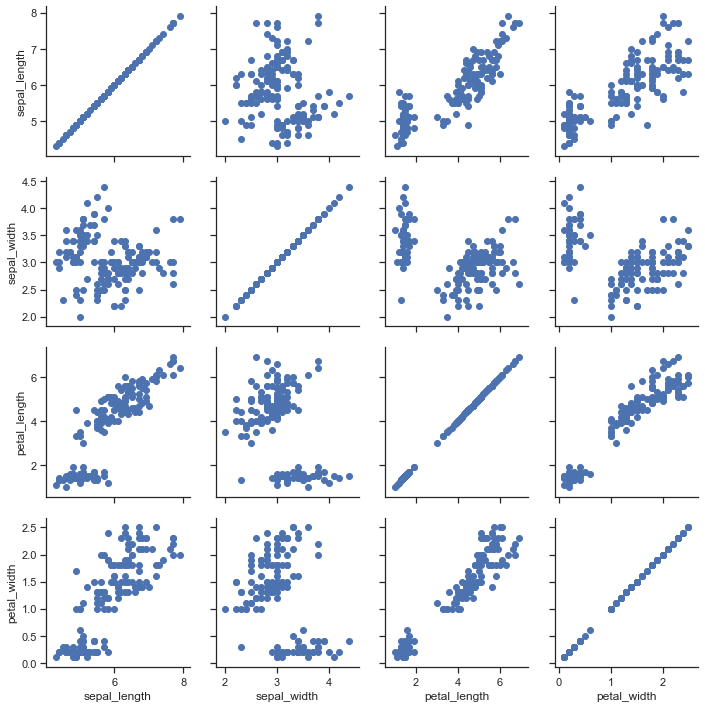

In [23]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

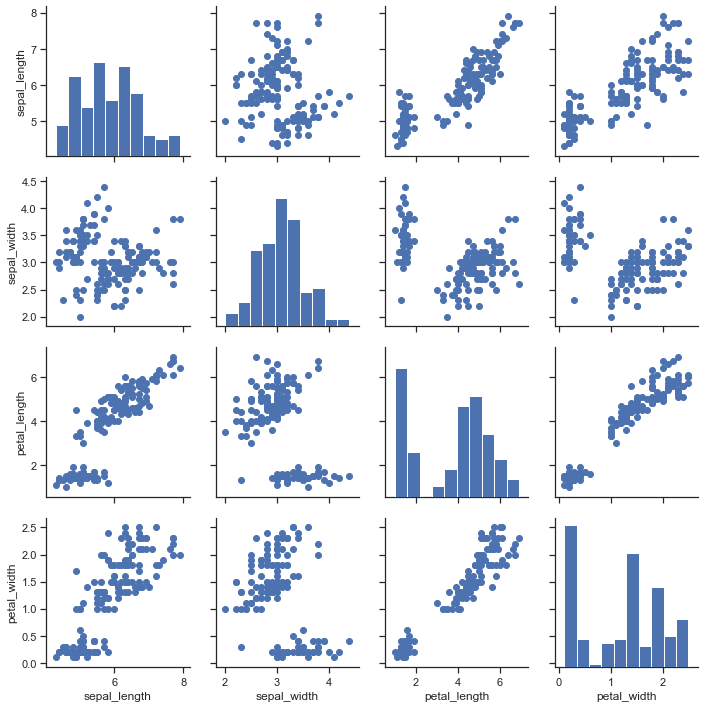

In [24]:
# 可以在对角线上绘制不同的函数，以显示每列中变量的单变量分布。 请注意，轴刻度线将不对应于该图的计数或密度轴
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

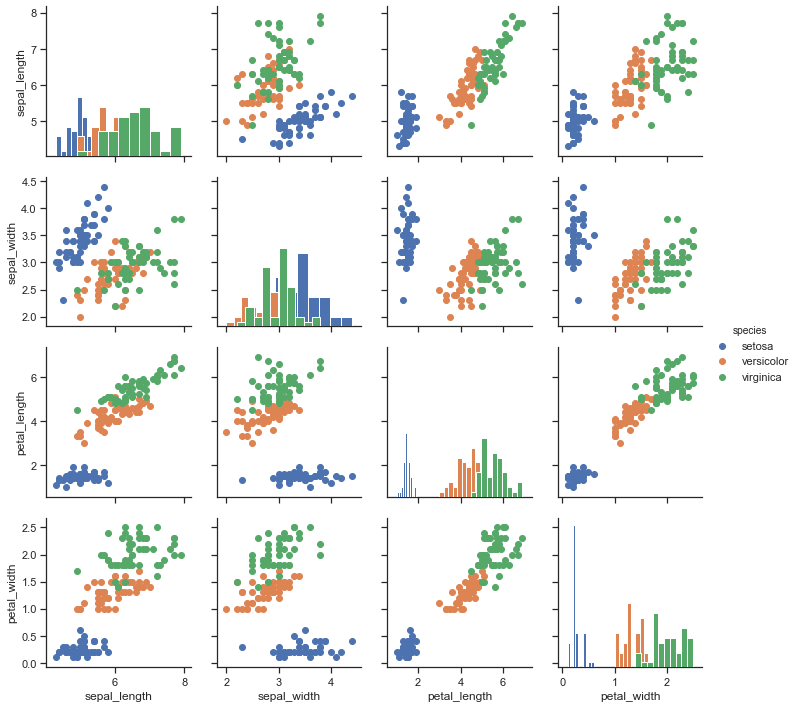

In [25]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

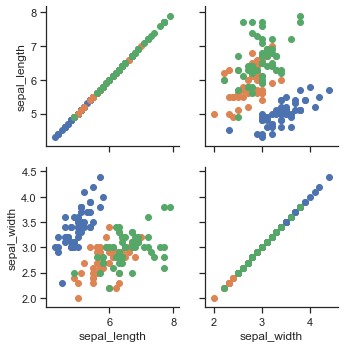

In [26]:
# 默认情况下，使用数据集中的每个数字列，但如果需要，您可以专注于特定的关系。
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

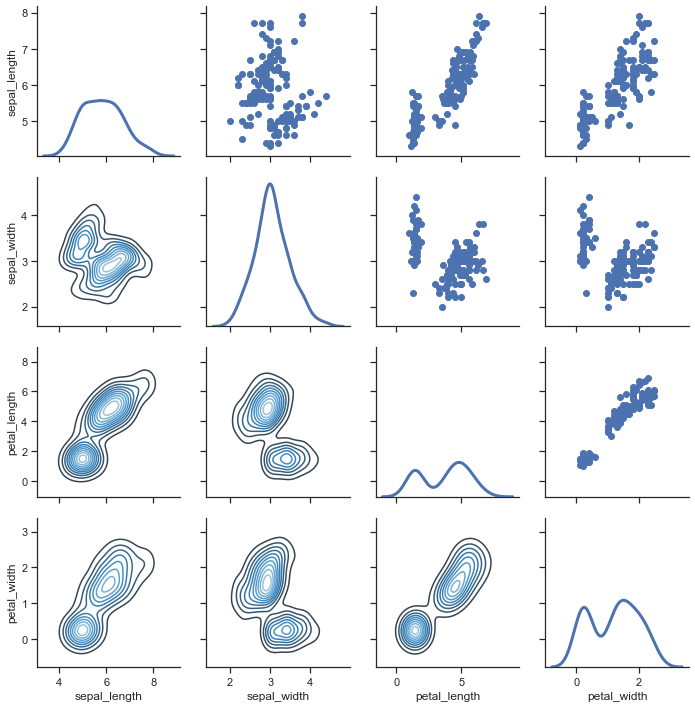

In [27]:
# 也可以在上下三角形中使用不同的功能来强调关系的不同方面
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)

d:\1902\.venv\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


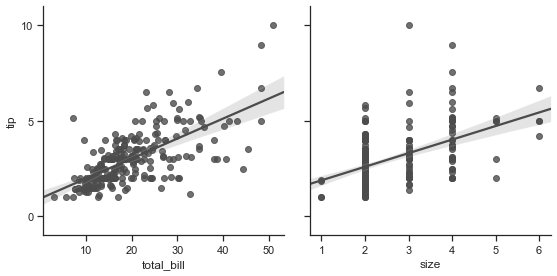

In [28]:
# 具有对角线上的身份关系的方形网格实际上只是一个特殊情况，您可以在行和列中绘制不同的变量。
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

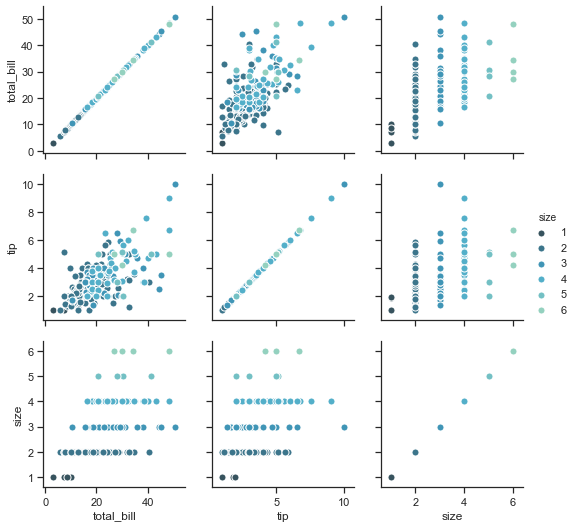

In [29]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

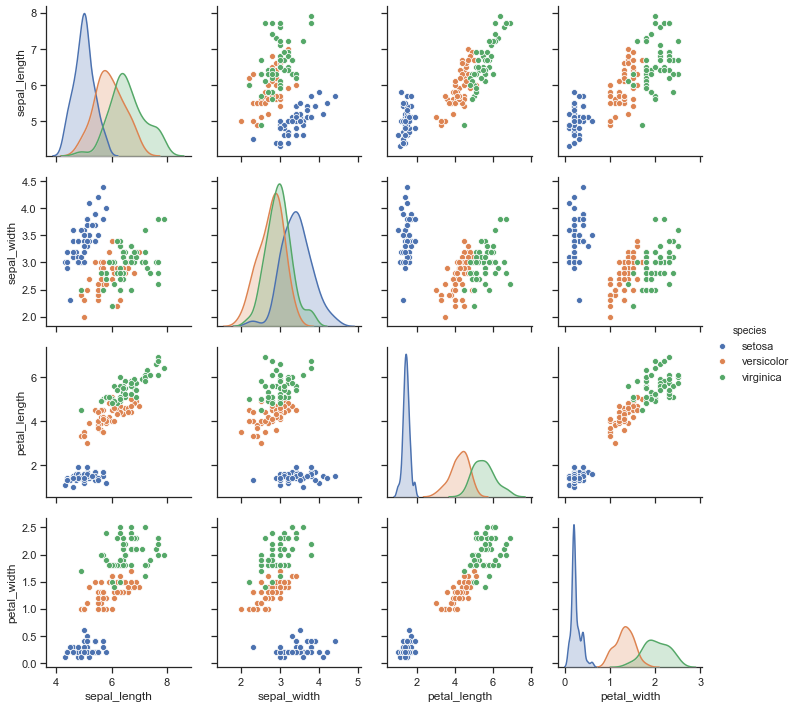

In [31]:
# PairGrid是灵活的，但是要快速查看一个数据集，可以使用pairplot()更容易。 默认情况下，该功能使用散点图和直方图，但是还可以添加其他几种（目前还可以绘制对角线上的对角线和KDEs的回归图）。
sns.pairplot(iris, hue="species", height=2.5)

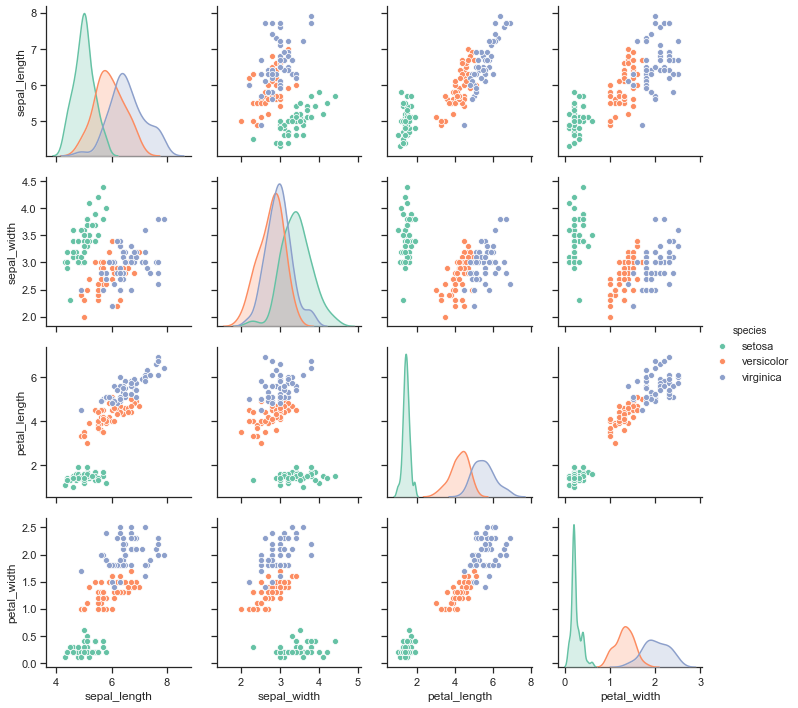

In [32]:
# 还可以使用关键字参数控制显示细节，并返回PairGrid实例进行进一步的调整
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)